In [1]:
import src.utility.utility_kepler_flare as ut_kep
import matplotlib.pyplot as plt
from scipy.stats import zscore
from src.Mean_EBinning.Mean_EBinning import Mean_EBinning

In [2]:
WIN_SIZE = 21
ini_bin = 8
LIST_FILES = ut_kep.get_files_list()
data = ut_kep.get_flare_data(flare_type='kepler', file_name=LIST_FILES[65])
ans_flare = range(data['time_start'] , data['time_start'] + data['flare_duration'])
ans_raise = range(data['time_start'], data['time_peak'])
raw_data = zscore(data["instances"])
timestamps = list(range(0, len(raw_data)))

EBinning = Mean_EBinning(max_window_size=WIN_SIZE, ini_binsize=ini_bin, alpha=0.95)
for instance in raw_data:
    EBinning.add_element(instance)

EBinning.insert_latest_buffer()
skectching_result = EBinning.get_skectching_result()
start_list = EBinning.get_starting_bin_index_list()

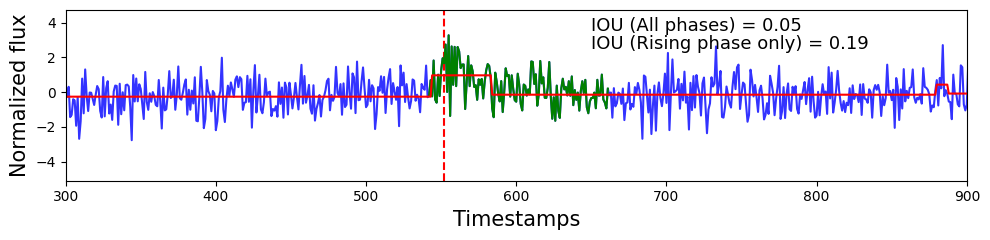

In [3]:
plt.figure(figsize=(10, 2.5))
plt.plot(raw_data,'blue', alpha =0.8)
plt.axvline(data['time_peak'],color='r', linestyle='--')
plt.plot(ans_flare,raw_data[data['time_start']:data['time_start'] + data['flare_duration']], color='green')
plt.plot(skectching_result,color='red')
plt.xlim(300,900)

set_ans_flare = set(list(range(data['time_start'] ,
                               data['time_start'] + data['flare_duration'])))
set_ans_raise = set(list(range(data['time_start'], data['time_peak'])))
# file 65 answer bin index 1
bin_range = set(list(range(start_list[1] ,start_list[2])))

intersec_flare = len(set_ans_raise.intersection(bin_range))
intersec_raise = len(set_ans_raise.intersection(bin_range))

iou_flare = round(intersec_flare / (len(bin_range) + len(set_ans_flare) - intersec_flare),2)
iou_raise = round(intersec_raise / (len(bin_range) + len(set_ans_raise) - intersec_raise),2)

plt.text(650, 3.5, f'IOU (All phases) = {iou_flare}', fontsize=13)
plt.text(650, 2.5, f'IOU (Rising phase only) = {iou_raise}', fontsize=13)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Normalized flux', fontsize=15)
plt.tight_layout()
plt.show()